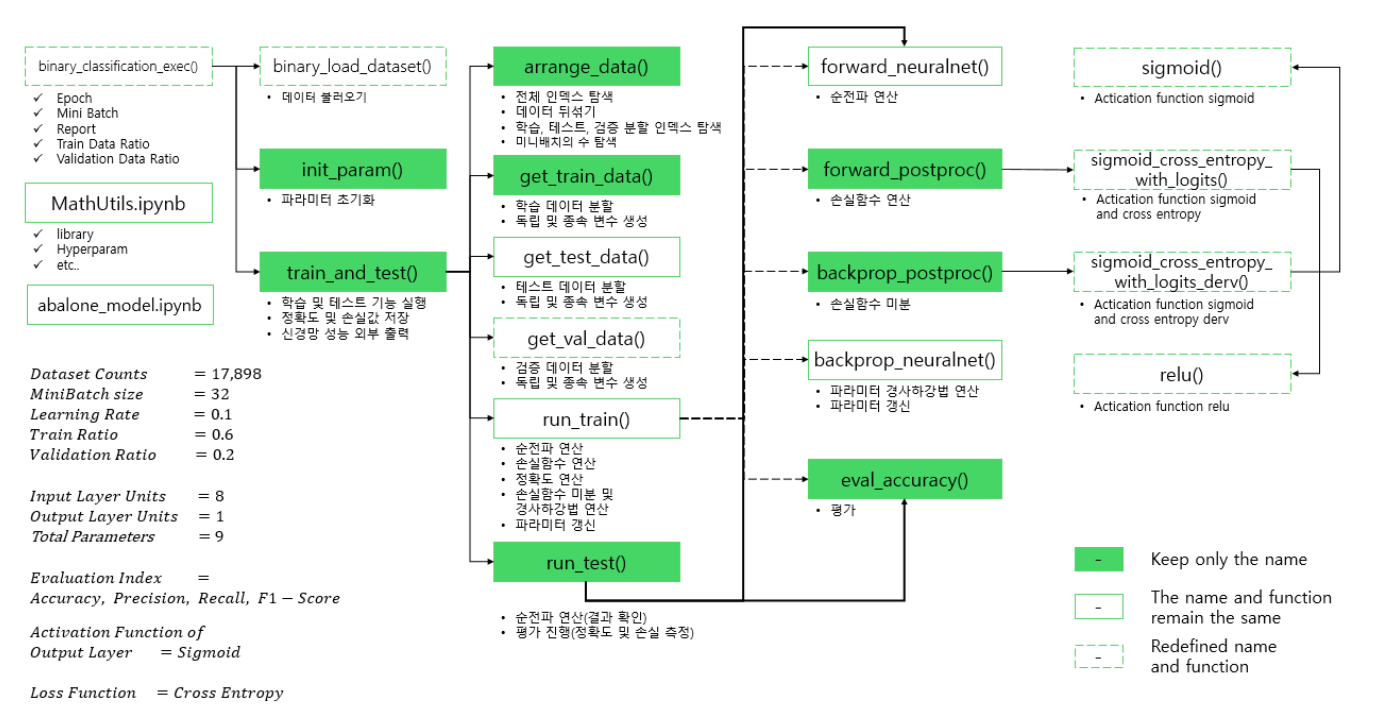

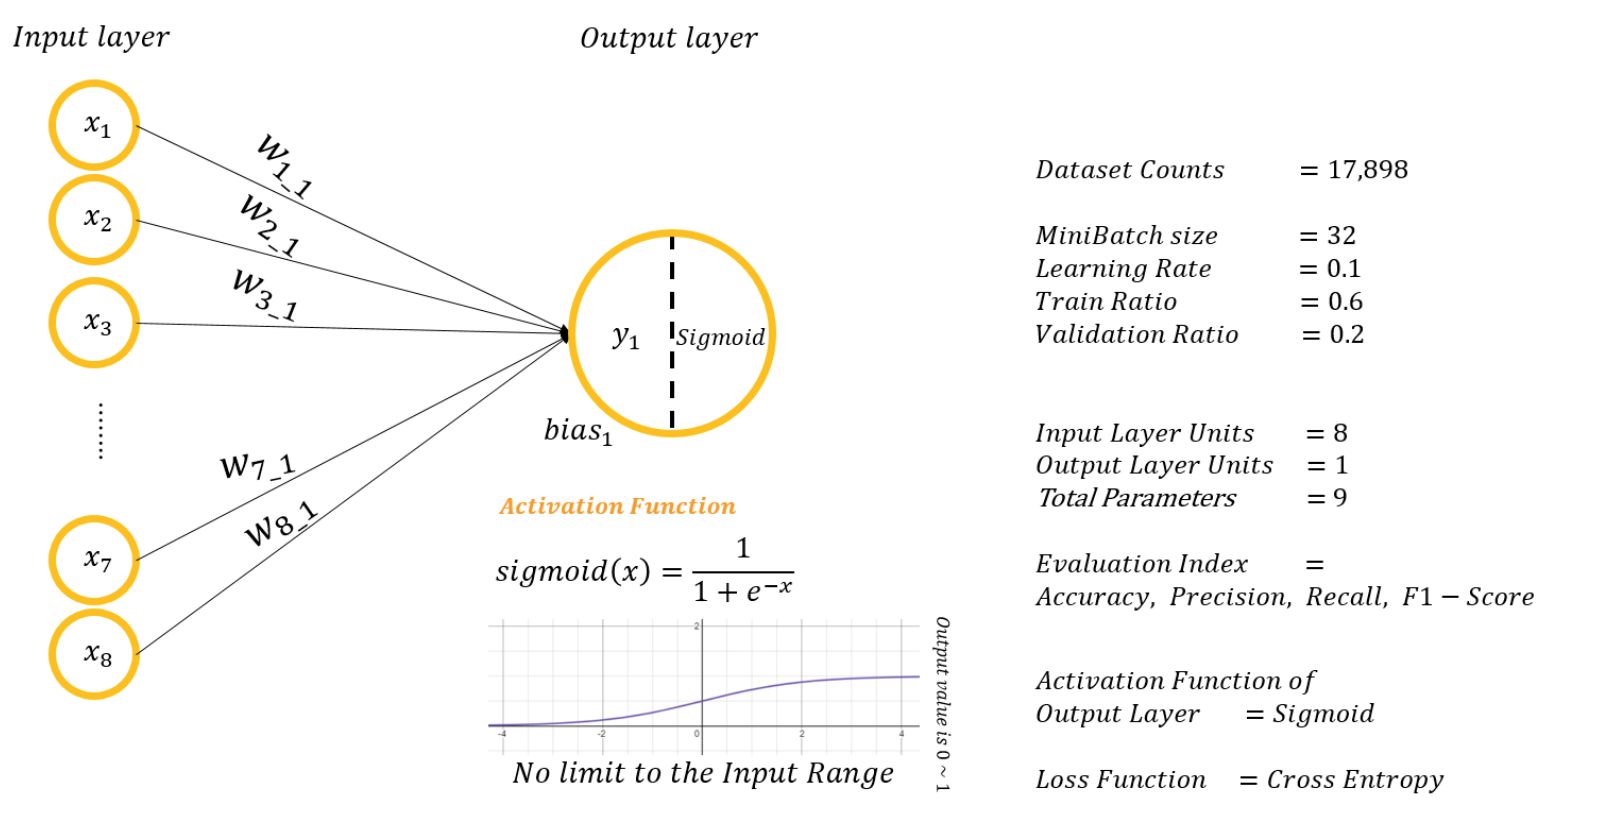

##첫번째 출력 
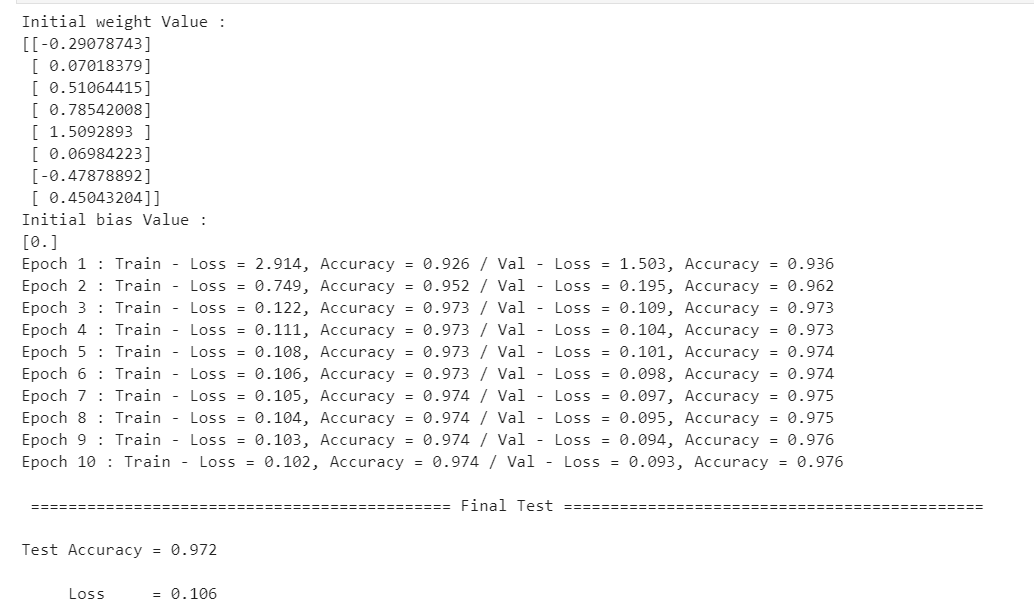

##두번째 출력 
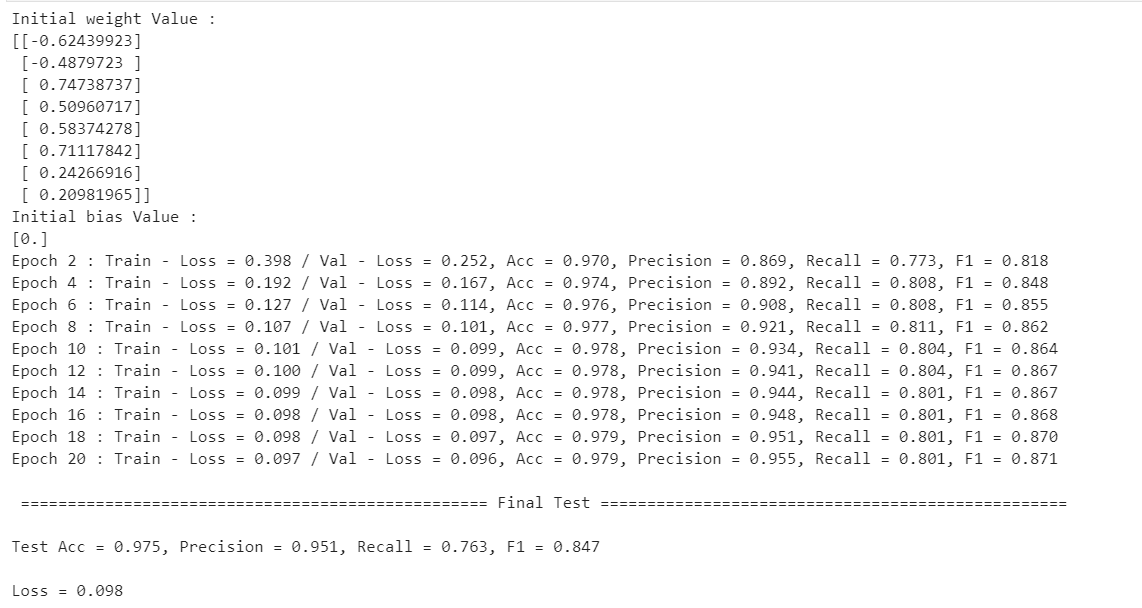

##시각화 
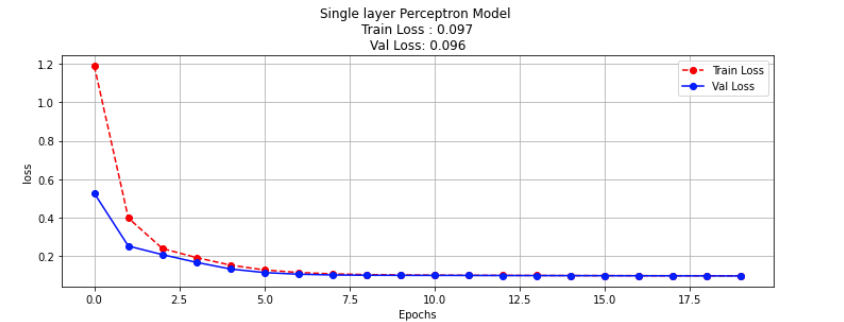

In [ ]:
%run /content/MathUtils.ipynb
%run /content/abalone_model.ipynb

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
#data load
df = pd.read_csv('/content/drive/MyDrive/인공지능사관학교/딥러닝/data/pulsar_stars_mini.csv')

In [ ]:
def binary_classsification_exec(epoch_count = 10,mb_size = 10,report = 1,train_ratio = 0.6,val_ratio = 0.2,adjust_ratio):
  binary_load_dataset(a)
  init_param()
  train_metrics_mean_row,val_metrics_row,test_metrics = train_and_test(epoch_count, mb_size, report, train_ratio,val_ratio)
  return train_metrics_mean_row,val_metrics_row,test_metrics


In [ ]:
def binary_load_dataset():
    with open('/content/pulsar_stars.csv') as csvfile:
    #with open('/content/pulsar_stars_mini.csv') as csvfile:
        csvreader = csv.reader(csvfile)
        next(csvreader)
        rows = []
        for row in csvreader:
            rows.append(row)

    global data, input_cnt, output_cnt

    input_cnt, output_cnt = 8, 1
    data = np.asarray(rows,dtype = 'float32') #문자화 데이터  = 숫자

In [ ]:
binary_load_dataset()

In [ ]:
def init_param():
    global weight, bias 

    #기능 축소
    #weight_initial = []
    #bias_initial   = []
    weight = np.random.normal(RND_MEAN, RND_STD, size = [input_cnt, output_cnt])
    bias   = np.zeros([output_cnt])
    print("Initial Weight Value : \n{}".format(weight))
    print("Initial Bias Value : \n{}".format(bias))
    #weight_initial.append(weight)
    #bias_initial.append(bias)

    #return weight_initial, bias_initial


In [ ]:
init_param()

Initial Weight Value : 
[[-0.01972666]
 [ 0.0031009 ]
 [ 0.046197  ]
 [-0.00280514]
 [ 0.00525728]
 [-0.04382894]
 [ 0.01656034]
 [ 0.00128453]]
Initial Bias Value : 
[0.]


In [ ]:
def arrange_data(mb_size,train_ratio,val_ratio):
    global shuffle_map, test_begin_index,val_begin_index

    shuffle_map = np.arange(data.shape[0])
    np.random.shuffle(shuffle_map)

    mini_batch_step_count = int(data.shape[0] * train_ratio) // mb_size
    val_begin_index = mini_batch_step_count * mb_size
    test_begin_index = int(val_begin_index+(val_ratio * data.shape[0]))
    return mini_batch_step_count

In [ ]:
mini_batch_step_count = arrange_data(1,0.6,0.2)

In [ ]:
print(mini_batch_step_count)
print(val_begin_index)
print(test_begin_index)

10738
10738
14317


In [ ]:
def get_train_data(mb_size, n):
    #기능 축소
    #if n == 0: 
    #    np.random.shuffle(shuffle_map[:test_begin_index])

    from_idx = mb_size * n
    to_idx = mb_size * (n+1)
    train_data = data[shuffle_map[from_idx : to_idx ]]

    return train_data[ : , : -output_cnt], train_data[ : , -output_cnt : ]

In [ ]:
def get_test_data():
    test_data = data[shuffle_map[test_begin_index:]]
    return test_data[ : , : -output_cnt], test_data[ : , -output_cnt : ]

In [ ]:
def get_val_data():
  val_data = data[shuffle_map[val_begin_index:test_begin_index]]
  return val_data[:,:-output_cnt] , val_data[:,-output_cnt:]

In [ ]:
train_x,train_y = get_train_data(mb_size = 6,n = 0)
val_x,val_y = get_val_data()
test_x,test_y = get_test_data()



In [ ]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)
print(val_x.shape)
print(val_y.shape)

(6, 8)
(6, 1)
(3581, 8)
(3581, 1)
(3579, 8)
(3579, 1)


In [ ]:
def run_train(x,y):
  loss = 0
  accuracy = 100
  return loss,accuracy

In [ ]:
def run_test(x,y): #검증 데이터도 전부 여기서 처리
  loss = 0
  accuracy = 100
  return loss,accuracy

In [ ]:
def train_and_test(epoch_count, mb_size, report, train_ratio, val_ratio):
    mini_batch_step_count = arrange_data(mb_size, train_ratio, val_ratio)

    test_x, test_y = get_test_data()
    val_x, val_y   = get_val_data()

    val_loss_row, val_acc_row      = [], []
    losses_mean_row, accs_mean_row = [], []

    # 에폭에 따른 반복문 
    for epoch in range(epoch_count):
        
        losses, accs = [], []

        # 배치에 따른 반복문 
        for n in range(mini_batch_step_count):

            train_x, train_y = get_train_data(mb_size, n)
            # 학습 데이터로 하는 학습 
            loss, acc        = run_train(train_x, train_y)

            losses.append(loss)
            accs.append(acc)

        # 검증 데이터로 하는 검증 
        val_loss, val_acc = run_test(val_x, val_y)

        val_loss_row.append(val_loss)
        val_acc_row.append(val_acc)

        if report > 0 and (epoch + 1) % report == 0:
            print("Epoch {} : Train - Loss = {:.3f}, Accuracy = {:.3f} / Val - Loss = {:.3f}, Accuracy = {:.3f}".\
                  format(epoch + 1, np.mean(losses), np.mean(accs), val_loss, val_acc))
        
        losses_mean = np.mean(losses)
        accs_mean   = np.mean(accs)

        losses_mean_row.append(losses_mean)
        accs_mean_row.append(accs_mean)
    
    # 테스트 데이터를 가지고 하는 테스트 
    test_loss, test_acc = run_test(test_x, test_y)

    print("\n", "=" * 40, "Final_Test", "=" * 40)
    print("\nTest Accuracy = {:.3f}".format(test_acc))
    print("\nTest Loss     = {:.3f}".format(test_loss))

    return [losses_mean_row , accs_mean_row] , [val_loss_row,val_acc_row] , [test_loss,test_acc]

In [ ]:
train_metrics_mean_row,val_metrics_row,test_metrics = train_and_test(epoch_count=10, mb_size=1, report=1, train_ratio=0.6,val_ratio=0.2)

Epoch 1 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss = 0.000, Accuracy = 100.000
Epoch 2 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss = 0.000, Accuracy = 100.000
Epoch 3 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss = 0.000, Accuracy = 100.000
Epoch 4 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss = 0.000, Accuracy = 100.000
Epoch 5 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss = 0.000, Accuracy = 100.000
Epoch 6 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss = 0.000, Accuracy = 100.000
Epoch 7 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss = 0.000, Accuracy = 100.000
Epoch 8 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss = 0.000, Accuracy = 100.000
Epoch 9 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss = 0.000, Accuracy = 100.000
Epoch 10 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss = 0.000, Accuracy = 100.000

 ======================================== Final_Test =========================

##손실함수 정확도 연산 부분 
이진 분류 교차 엔트로피를 사용한다 

In [ ]:
def forward_neuralnet(x):
    y_hat = np.matmul(x, weight) + bias
    return y_hat, x

In [ ]:
y_hat,_ = forward_neuralnet(train_x)

In [ ]:
print(y_hat)

[[-2.45143659]
 [-2.58476942]
 [-3.15995155]
 [-3.02306477]
 [-3.43509397]
 [-2.77488515]]


In [ ]:
def relu(x):
  return np.maximum(x,0)

In [ ]:
def sigmoid_cross_entropy_with_logit(z,x):
  return relu(x) - x * z + np.log(1+np.exp(-np.abs(x)))

In [ ]:
loss = sigmoid_cross_entropy_with_logit(train_y,y_hat)

In [ ]:
print('loss :{}'.format(loss))

loss :[[0.08265748]
 [0.07270521]
 [0.04155241]
 [0.04750542]
 [0.03171413]
 [0.06048968]]


In [ ]:
def forward_postproc(y_hat,y):
  CEE = sigmoid_cross_entropy_with_logit(y,y_hat)
  loss = np.mean(CEE)
  return loss,[y,y_hat,CEE]

In [ ]:
loss,_= forward_postproc(y_hat,train_y)

In [ ]:
print(loss.shape)

()


In [ ]:
print(loss)

0.05610405495698976


##역전파 계산 

In [ ]:
def backprop_neuralnet(G_output, x):
    global weight, bias 

    x_transpose = x.transpose()
    G_w = np.matmul(x_transpose, G_output)
    
    G_b = np.sum(G_output, axis = 0)

    weight -= LEARNING_RATE * G_w
    bias   -= LEARNING_RATE * G_b

In [ ]:
def sigmoid_cross_entropy_with_logit_derv(z,x):
  return -z + sigmoid(x)

In [ ]:
def sigmoid(x):
  return np.exp(-relu(-x)) / (1+np.exp(-np.abs(x)))

In [ ]:
sigmoid(y_hat)

array([[0.07933356],
       [0.07012509],
       [0.04070095],
       [0.04639469],
       [0.03121651],
       [0.05869652]])

In [ ]:
sigmoid_cross_entropy_with_logit_derv(train_y,y_hat)

array([[0.07933356],
       [0.07012509],
       [0.04070095],
       [0.04639469],
       [0.03121651],
       [0.05869652]])

In [ ]:
def backprop_postproc(aux_pp_y_output_CEE):
   y,y_hat,CEE = aux_pp_y_output_CEE
   g_loss_entropy = 1.0/np.prod(CEE.shape)
   g_entropy_output = sigmoid_cross_entropy_with_logit_derv(y,y_hat)
   
   g_output = g_loss_entropy * g_entropy_output
   return g_output

In [ ]:
output_list = [-10,-5,0,6,12]

for output in output_list:
  result = sigmoid(output)
  print(np.round(result)) #실제 정답과 비교 불가  0 아니면 1 이랑 같은지만 

0.0
0.0
0.0
1.0
1.0


In [ ]:
output_list = [-10,-5,0,6,12]

for output in output_list:
  print(np.greater(output,0))
   #실제 정답과 비교 불가  0 아니면 1 이랑 같은지만 

False
False
False
True
True


In [ ]:
def eval_accuracy(y,y_hat):
  estimate = np.greater(y_hat,0) #양수면 True 음수면 False

  answer = np.greater(y,0.5) #0 과 1이니까 절반인 0.5를 기준으로 비교 
  correct = np.equal(estimate,answer)

  return np.mean(correct)

In [ ]:
eval_accuracy(train_y,y_hat)*100

100.0

In [ ]:
def run_train(x,y):
  y_hat,aux_nn_x = forward_neuralnet(x)
  loss,aux_pp_y_yhat_CEE = forward_postproc(y_hat,y)
  acc = eval_accuracy(y,y_hat)

  #역전파 수행
  g_output = backprop_postproc(aux_pp_y_yhat_CEE)
  backprop_neuralnet(g_output,x)

  return loss,acc

In [ ]:
run_train(train_x,train_y)

(0.05610405495698976, 1.0)

In [ ]:
def run_test(x,y):
  y_hat,_ = forward_neuralnet(x)
  loss,_ = forward_postproc(y_hat,y)
  acc = eval_accuracy(y,y_hat)

  return loss, acc

In [ ]:
train_metrics_mean_row,val_metrics_row,test_metrics = binary_classsification_exec(epoch_count = 100,mb_size = 32,report = 1,train_ratio = 0.6,val_ratio = 0.2)

Initial Weight Value : 
[[ 0.00931094]
 [ 0.02382441]
 [ 0.01590563]
 [ 0.00313679]
 [-0.024932  ]
 [ 0.00480997]
 [ 0.00574732]
 [-0.01532847]]
Initial Bias Value : 
[0.]
Epoch 1 : Train - Loss = 6.390, Accuracy = 0.943 / Val - Loss = 1.652, Accuracy = 0.968
Epoch 2 : Train - Loss = 7.051, Accuracy = 0.948 / Val - Loss = 2.145, Accuracy = 0.964
Epoch 3 : Train - Loss = 8.777, Accuracy = 0.951 / Val - Loss = 3.579, Accuracy = 0.926
Epoch 4 : Train - Loss = 7.112, Accuracy = 0.951 / Val - Loss = 3.541, Accuracy = 0.930
Epoch 5 : Train - Loss = 6.777, Accuracy = 0.954 / Val - Loss = 2.851, Accuracy = 0.940
Epoch 6 : Train - Loss = 6.846, Accuracy = 0.957 / Val - Loss = 3.087, Accuracy = 0.930
Epoch 7 : Train - Loss = 6.987, Accuracy = 0.953 / Val - Loss = 3.227, Accuracy = 0.930
Epoch 8 : Train - Loss = 6.608, Accuracy = 0.955 / Val - Loss = 2.450, Accuracy = 0.952
Epoch 9 : Train - Loss = 6.729, Accuracy = 0.954 / Val - Loss = 2.950, Accuracy = 0.938
Epoch 10 : Train - Loss = 7.254, Acc

##시각화 

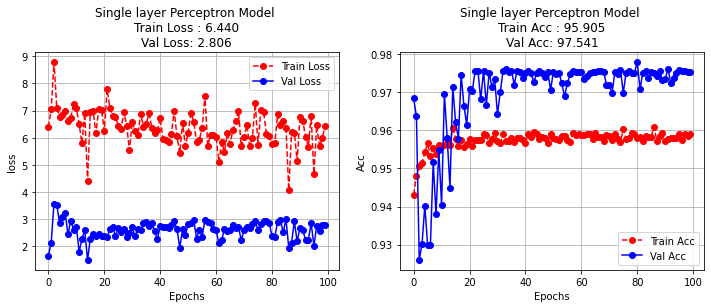

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)

plt.plot(train_metrics_mean_row[0], '--o', color = 'red', label = 'Train Loss')
plt.plot(val_metrics_row[0], '-o', color = 'blue', label = 'Val Loss')

plt.title('Single layer Perceptron Model \nTrain Loss : {:.3f}\nVal Loss: {:.3f}'.format(train_metrics_mean_row[0][-1] , val_metrics_row[0][-1]))
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)

plt.plot(train_metrics_mean_row[1], '--o', color = 'red', label = 'Train Acc')
plt.plot(val_metrics_row[1], '-o', color = 'blue', label = 'Val Acc')

plt.title('Single layer Perceptron Model \nTrain Acc : {:.3f}\nVal Acc: {:.3f}'.format(train_metrics_mean_row[1][-1] * 100 , val_metrics_row[1][-1] * 100))
plt.xlabel('Epochs')
plt.ylabel('Acc')
#plt.ylim(0.9,1)
plt.grid()
plt.legend()

plt.show()

In [ ]:
new_x = [44.796875, 
         30.17303209, 
         4.735203756, 
         27.96010082, 
         30.69314381, 
         61.82819804, 
         2.156630767, 
         3.773395708]

In [ ]:
pred_y,_ = forward_neuralnet(new_x)
pred_y_sigmoid = sigmoid(pred_y)

print(pred_y_sigmoid)

[1.]


In [ ]:
print(weight)
print(bias)

[[-1.95290719]
 [ 3.0075955 ]
 [13.0453378 ]
 [22.42229262]
 [-1.61320263]
 [ 0.78220409]
 [ 5.58817287]
 [-2.73124967]]
[-0.12674516]


##데이터 증폭 / 평가지표 수정 

In [ ]:
def binary_classsification_exec(epoch_count = 10,mb_size = 10,report = 1,train_ratio = 0.6,val_ratio = 0.2,ad_just_ratio = False):
  binary_load_dataset(ad_just_ratio)
  init_param()
  train_metrics_mean_row,val_metrics_row,test_metrics = train_and_test(epoch_count, mb_size, report, train_ratio,val_ratio)
  return train_metrics_mean_row,val_metrics_row,test_metrics

In [ ]:
def binary_load_dataset(ad_just_ratio):
    pulsars = []
    stars = []
    with open('/content/pulsar_stars.csv') as csvfile:
    #with open('/content/pulsar_stars_mini.csv') as csvfile:
        csvreader = csv.reader(csvfile)
        next(csvreader)

        for row in csvreader:
            if row[8] == '1':
              pulsars.append(row)
            else:
              stars.append(row)

    global data, input_cnt, output_cnt

    input_cnt, output_cnt = 8, 1
    
    star_cnt,pulsar_cnt = len(stars),len(pulsars)

    #데이터 증폭 과정 수행
    if ad_just_ratio:
      data = np.zeros([star_cnt*2,9])
      data[0:star_cnt,:] = np.asarray(stars,dtype='float32')

      for n in range(star_cnt):
        data[star_cnt+n] = np.asarray(pulsars[n%pulsar_cnt] ,dtype = 'float32')

    else:
      data = np.zeros([star_cnt+pulsar_cnt,9])
      data[0:star_cnt,:] = np.asarray(stars,dtype='float32')
      data[star_cnt:,:] = np.asarray(pulsars,dtype = 'float32')

In [ ]:
binary_load_dataset(True)
print(data.shape)
binary_load_dataset(False)
print(data.shape)

(32518, 9)
(17898, 9)


In [ ]:
data

array([[140.5625    ,  55.68378067,  -0.23457141, ...,   7.97553158,
         74.24222565,   0.        ],
       [102.5078125 ,  58.88243103,   0.46531814, ...,  10.57648659,
        127.39357758,   0.        ],
       [103.015625  ,  39.3416481 ,   0.32332838, ...,   7.7358222 ,
         63.17190933,   0.        ],
       ...,
       [ 48.3671875 ,  30.057724  ,   4.50091219, ...,   0.740556  ,
         -0.60604012,   1.        ],
       [ 65.0703125 ,  34.73317719,   2.26607513, ...,   3.77811432,
         14.68210793,   1.        ],
       [ 84.0078125 ,  34.25239563,   1.36355782, ...,   4.08432388,
         15.84995556,   1.        ]])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score




In [ ]:
def eval_accuracy_sk(y_hat,y):
  pred_y = np.greater(y_hat,0)
  real_y = np.greater(y,0.5)

  acc = accuracy_score(real_y,pred_y)
  precision = precision_score(real_y,pred_y)
  recall = recall_score(real_y,pred_y)
  f1 = f1_score(real_y,pred_y)

  return [acc,precision,recall,f1]

In [ ]:
metrics = eval_accuracy_sk(y_hat,train_y)
print(metrics)

[1.0, 0.0, 0.0, 0.0]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


In [ ]:
def eval_accuracy_numpy(output,y):

    # 예측값을 0과 비교하여 줍니다. 
    # 예측값을 0과 비교하는 이유는 시그모이드 활성화 함수의 특징인데, 
    # 입력값이 음수인 경우는 출력값이 0.5 보다 작으니 0으로, 
    # 입력값이 양수인 경우는 출력값이 0.5 보다 크니 1로 판단할 수 있습니다.

    est_yes = np.greater(output,0)
    ans_yes = np.greater(y, 0.5)

    est_no = np.logical_not(est_yes) 
    ans_no = np.logical_not(ans_yes)


    # 마찬가지로 평가에 사용된 결과를 모두 더해 
    # 각각의 혼동행렬을 만들어 줍니다.  
    tp = np.sum(np.logical_and(est_yes, ans_yes))
    tn = np.sum(np.logical_and(est_no, ans_no))
    fp = np.sum(np.logical_and(ans_no, est_yes))
    fn = np.sum(np.logical_and(ans_yes, est_no))

    # 다음은 정확도 측정 지표를 만들어 줍니다. 
    # 이때 나눗셈의 경우 0으로 나눠지는 경우가 
    # 발생할 수 있기에, 
    # 이 점을 고려하여 안전한 나눗셈 함수를 만들어 주겠습니다. 
    accuracy = safe_div(tp+tn,tp+fp+fn+tn)
    precision = safe_div(tp,tp+fp)
    recall = safe_div(tp,tp+fn)
    f1 = 2 * safe_div(recall*precision,recall+precision)
    
    return [accuracy, precision, recall, f1]

In [ ]:
eval_accuracy_numpy(y_hat,train_y)

[1.0, 0.0, 0.0, 0.0]

In [ ]:
def safe_div(p,q):
  p,q = float(p),float(q)
  if np.abs(q)<1.0e-20:
    return np.sign(p)
  return p/q

In [ ]:
def run_test(x,y):
  y_hat,_ = forward_neuralnet(x)
  loss,_ = forward_postproc(y_hat,y)
  #acc = eval_accuracy(y,y_hat)
  acc = eval_accuracy_numpy(y_hat,y)

  return loss, acc

In [ ]:
def run_train(x,y):
  y_hat,aux_nn_x = forward_neuralnet(x)
  loss,aux_pp_y_yhat_CEE = forward_postproc(y_hat,y)
  #acc = eval_accuracy(y,y_hat)
  acc = eval_accuracy_numpy(y_hat,y)
  #역전파 수행
  g_output = backprop_postproc(aux_pp_y_yhat_CEE)
  backprop_neuralnet(g_output,x)

  return loss,acc

In [ ]:
def train_and_test(epoch_count, mb_size, report, train_ratio, val_ratio):

    mini_batch_step_count = arrange_data(mb_size,train_ratio, val_ratio)

    test_x, test_y = get_test_data()
    val_x,  val_y  = get_val_data()

    losses_mean_row = []
    val_loss_row    = []

    #losses_mean_row, accs_mean_row = [], []
    #val_loss_row, val_acc_row      = [], []
    
    for epoch in range(epoch_count):

        losses = []
        #accs = []

        for n in range(mini_batch_step_count):
            train_x, train_y  = get_train_data(mb_size, n)
           
            loss, _           = run_train(train_x,train_y)
               
            losses.append(loss)
            #accs.append(acc)

        val_loss, val_acc = run_test(val_x, val_y)
        val_loss_row.append(val_loss)
        #val_acc_row.append(val_acc)  

        if report > 0 and (epoch+1) % report == 0:
            
            print("Epoch {} : Train - Loss = {:.3f} / Val - Loss = {:.3f}, Acc = {:.3f}, Precision = {:.3f}, Recall = {:.3f}, F1 = {:.3F}".\
                  format(epoch+1, np.mean(losses), val_loss, val_acc[0], val_acc[1], val_acc[2], val_acc[3]))
            
        losses_mean = np.mean(losses) 
        #accs_mean = np.mean(accs)

        losses_mean_row.append(losses_mean)  
        #accs_mean_row.append(accs_mean)   



    test_loss, test_acc = run_test(test_x, test_y)
    
    print("\n","=" * 50, 'Final Test', '=' * 50)
    print('\nTest Acc = {:.3f}, Precision = {:.3f}, Recall = {:.3f}, F1 = {:.3F}'.\
          format(test_acc[0], test_acc[1], test_acc[2], test_acc[3]))
    print('\nLoss = {:.3f}'.format(test_loss))

    #return [losses_mean_row, accs_mean_row], [val_loss_row, val_acc_row], [test_loss , test_acc]
    return [losses_mean_row], [val_loss_row], [test_loss , test_acc]

In [ ]:
metrics = train_and_test(epoch_count=5,mb_size=32,report=1,train_ratio=0.6,val_ratio=0.2)
print(metrics)

Epoch 1 : Train - Loss = 5.712 / Val - Loss = 10.819, Acc = 0.955, Precision = 0.974, Recall = 0.484, F1 = 0.646
Epoch 2 : Train - Loss = 5.753 / Val - Loss = 6.811, Acc = 0.960, Precision = 0.971, Recall = 0.546, F1 = 0.699
Epoch 3 : Train - Loss = 7.149 / Val - Loss = 3.587, Acc = 0.972, Precision = 0.936, Recall = 0.716, F1 = 0.811
Epoch 4 : Train - Loss = 6.063 / Val - Loss = 2.676, Acc = 0.972, Precision = 0.944, Recall = 0.719, F1 = 0.816
Epoch 5 : Train - Loss = 5.602 / Val - Loss = 3.492, Acc = 0.970, Precision = 0.967, Recall = 0.670, F1 = 0.792

 ================================================== Final Test ==================================================

Test Acc = 0.972, Precision = 0.981, Recall = 0.724, F1 = 0.833

Loss = 5.395
([[5.712045433207297, 5.75259239392451, 7.149346940765182, 6.062694666914752, 5.602314218421752]], [[10.81927410266574, 6.811405241547328, 3.587274166713845, 2.6758074751246324, 3.4922257338839264]], [5.39467987643054, [0.9716587941094749, 0.980

In [ ]:
train_metrics_mean_row,val_metrics_row,test_metrics = binary_classsification_exec(epoch_count = 100,mb_size = 32,report = 1,train_ratio = 0.6,val_ratio = 0.2,ad_just_ratio =True)

Initial Weight Value : 
[[ 0.02154771]
 [ 0.07999164]
 [-0.01991107]
 [ 0.00330946]
 [ 0.00325918]
 [-0.01799724]
 [ 0.01673918]
 [-0.03242907]]
Initial Bias Value : 
[0.]
Epoch 1 : Train - Loss = 20.682 / Val - Loss = 23.337, Acc = 0.897, Precision = 0.980, Recall = 0.812, F1 = 0.888
Epoch 2 : Train - Loss = 17.902 / Val - Loss = 7.096, Acc = 0.884, Precision = 0.844, Recall = 0.942, F1 = 0.890
Epoch 3 : Train - Loss = 17.108 / Val - Loss = 6.362, Acc = 0.869, Precision = 0.823, Recall = 0.940, F1 = 0.878
Epoch 4 : Train - Loss = 17.546 / Val - Loss = 7.086, Acc = 0.856, Precision = 0.801, Recall = 0.947, F1 = 0.868
Epoch 5 : Train - Loss = 16.817 / Val - Loss = 6.583, Acc = 0.892, Precision = 0.860, Recall = 0.936, F1 = 0.897
Epoch 6 : Train - Loss = 15.857 / Val - Loss = 7.103, Acc = 0.895, Precision = 0.865, Recall = 0.935, F1 = 0.899
Epoch 7 : Train - Loss = 16.223 / Val - Loss = 6.493, Acc = 0.919, Precision = 0.917, Recall = 0.922, F1 = 0.919
Epoch 8 : Train - Loss = 16.417 / Va

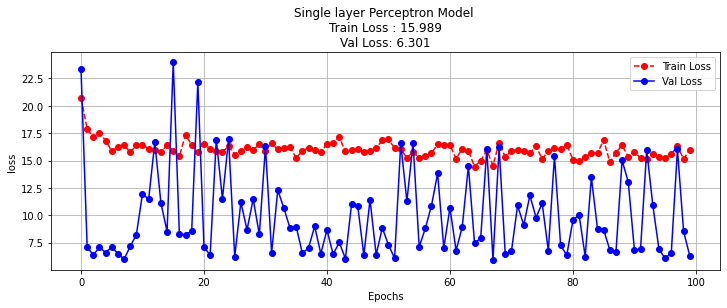

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.plot(train_metrics_mean_row[0], '--o', color = 'red', label = 'Train Loss')
plt.plot(val_metrics_row[0], '-o', color = 'blue', label = 'Val Loss')

plt.title('Single layer Perceptron Model \nTrain Loss : {:.3f}\nVal Loss: {:.3f}'.format(train_metrics_mean_row[0][-1] , val_metrics_row[0][-1]))
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.grid()
plt.legend()

plt.show()
